(366, 22)
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4

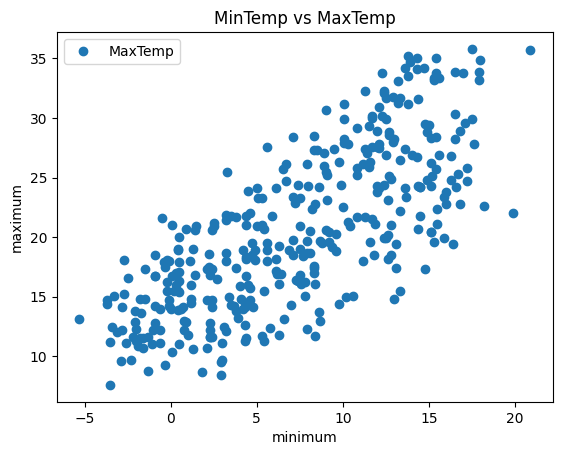

<ipython-input-1-2363414236>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MaxTemp"])


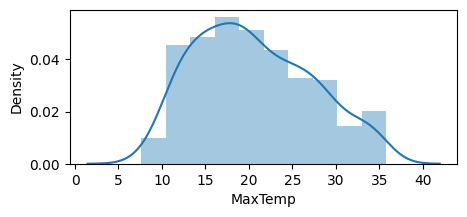

Intercept: [14.56202411]
Coefficients: [[0.81953755]]
    Actual  Predicted:
0     25.2   23.413030
1     11.5   13.086857
2     21.1   27.264856
3     22.2   25.461874
4     20.4   26.937041
..     ...         ...
69    18.9   20.216833
70    22.8   27.674625
71    16.1   21.446140
72    25.1   24.970151
73    12.2   14.070302

[74 rows x 2 columns]


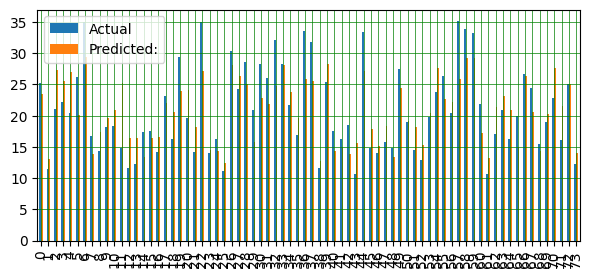

Mean Squared Error 17.011877668640622
Mean Absolute Error 3.5094353112899594


In [ ]:
#linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data=pd.read_csv("weather.csv")

print(data.shape)
print(data.head(5))
print(data.describe())

#data analysis
data.plot(x="MinTemp",y="MaxTemp",style="o")
plt.title("MinTemp vs MaxTemp")
plt.xlabel("minimum")
plt.ylabel("maximum")
plt.show()

plt.figure(figsize=(5,2))
plt.tight_layout()
sns.distplot(data["MaxTemp"])
plt.show()

x=data['MinTemp'].values.reshape([-1,1])
y=data['MaxTemp'].values.reshape([-1,1])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#creating instance of class and train the algorithm
regressor=LinearRegression()
regressor.fit(x_train,y_train)

print("Intercept:", regressor.intercept_)
print("Coefficients:",  regressor.coef_)

y_pred=regressor.predict(x_test)
df=pd.DataFrame({"Actual":y_test.flatten(),"Predicted:":y_pred.flatten()})
print(df);

df1=df.head(25)

df.plot(kind="bar",figsize=(7,3))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))






   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
5            2   mandarin      mandarin    80    5.8     4.3         0.77
6            2   mandarin      mandarin    80    5.9     4.3         0.81
7            2   mandarin      mandarin    76    5.8     4.0         0.81
8            1      apple      braeburn   178    7.1     7.8         0.92
9            1      apple      braeburn   172    7.4     7.0         0.89
(59, 7)
['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


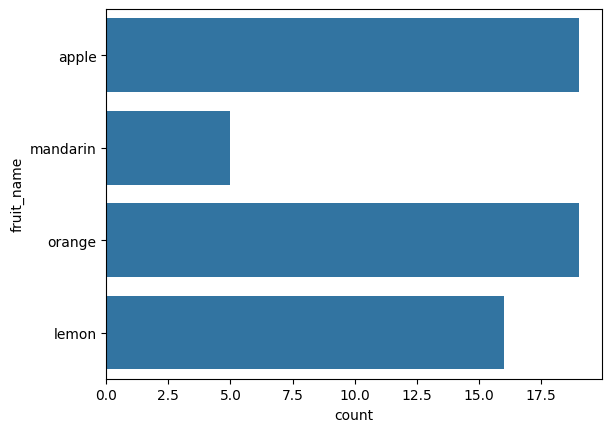

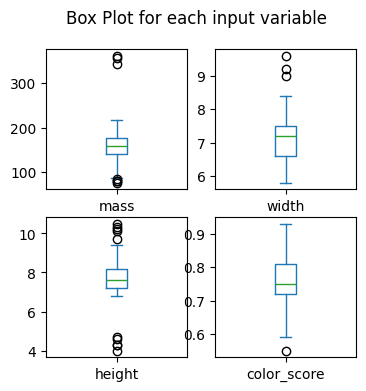

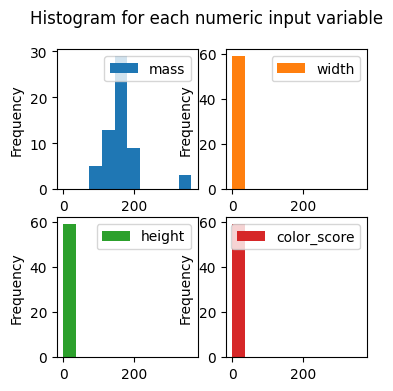

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt"
fruits = pd.read_table(url, sep="\t")
print(fruits.head(10))
print(fruits.shape)
print(fruits["fruit_name"].unique())
print(fruits.groupby("fruit_name").size())

sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(4,4),
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

fruits.drop('fruit_label', axis=1).plot(kind='hist', subplots=True, layout=(2,2), sharex=False, figsize=(4,4),
                                        title='Histogram for each numeric input variable')
plt.savefig('fruits_hist')
plt.show()



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

feature_names=['mass','width','height','color_score']
x=fruits[feature_names]
y=fruits['fruit_name']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
scaler=MinMaxScaler()
#normalizing the data so that they fall in a similar range
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



In [ ]:
#1.logistic regression
Logreg=LogisticRegression()
Logreg.fit(x_train,y_train)
print("Train set accuracy with logistic regression on Train Set: {:.2f}".format(Logreg.score(x_train,y_train)))
print("Test set accuracy with logistic regression on Test Set: {:.2f}".format(Logreg.score(x_test,y_test)))


Train set accuracy with logistic regression on Train Set: 0.75
Test set accuracy with logistic regression on Test Set: 0.47


In [ ]:
#2.Decison Tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
print("Train set accuracy with decision tree on Train set: {:.2f}".format(clf.score(x_train,y_train)))
print("Test set accuracy with decision tree on Test set: {:.2f}".format(clf.score(x_test,y_test)))

Train set accuracy with decision tree on Train set: 1.00
Test set accuracy with decision tree on Test set: 0.73


In [ ]:
#3.KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Train set accuracy with KNN on Train set: {:.2f}".format(knn.score(x_train,y_train)))
print("Test set accuracy with KNN on Test set: {:.2f}".format(knn.score(x_test,y_test)))

Train set accuracy with KNN on Train set: 0.95
Test set accuracy with KNN on Test set: 0.93


In [ ]:
#4.Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print("Train set accuracy with Naive Bayes on Train set: {:.2f}".format(gnb.score(x_train,y_train)))
print("Test set accuracy with KNN on Test set: {:.2f}".format(gnb.score(x_test,y_test)))

Train set accuracy with Naive Bayes on Train set: 0.86
Test set accuracy with KNN on Test set: 0.67


In [ ]:
#5.Support Vector Machine Classifier
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
print("Train set accuracy with SVM on Train set: {:.2f}".format(svm.score(x_train,y_train)))
print("Test set accuracy with SVM on Test set: {:.2f}".format(svm.score(x_test,y_test)))

Train set accuracy with SVM on Train set: 0.91
Test set accuracy with SVM on Test set: 0.80


In [ ]:
#comparison of results
pred_knn=knn.predict(x_test)
pred_Logreg=Logreg.predict(x_test)
pred_clf=clf.predict(x_test)
pred_gnb=gnb.predict(x_test)
pred_svm=svm.predict(x_test)
comparison_df=pd.DataFrame({"Logistic Regression:":pred_Logreg,
                           "Decision Trees:":pred_clf,
                           "KNN:":pred_knn,
                           "Naive Bayes:":pred_gnb,
                           "SVM:":pred_svm,
                           "Actual": y_test.values if hasattr(y_test, 'values') else y_test})
print(comparison_df.head(8))

  Logistic Regression: Decision Trees:    KNN: Naive Bayes:    SVM:  Actual
0               orange           lemon  orange       orange  orange  orange
1                apple          orange  orange        apple  orange  orange
2                lemon           lemon   lemon        lemon   lemon   lemon
3                lemon           apple   lemon        lemon   lemon  orange
4                apple           apple   apple        apple   apple   apple
5                apple           apple   apple        apple   apple   apple
6                apple           apple  orange        apple   apple  orange
7                lemon           lemon   lemon        lemon   lemon   lemon


In [ ]:
#comparison of accuracies
from sklearn.metrics import accuracy_score

print("\nModel Accuracies:")
print(f"Logistic Regression: {accuracy_score(y_test, pred_Logreg):.2f}")
print(f"Decision Tree: {accuracy_score(y_test, pred_clf):.2f}")
print(f"KNN: {accuracy_score(y_test, pred_knn):.2f}")
print(f"Naive Bayes: {accuracy_score(y_test, pred_gnb):.2f}")
print(f"SVM: {accuracy_score(y_test, pred_svm):.2f}")


Model Accuracies:
Logistic Regression: 0.47
Decision Tree: 0.73
KNN: 0.93
Naive Bayes: 0.67
SVM: 0.80


In [ ]:
!pip install Pillow


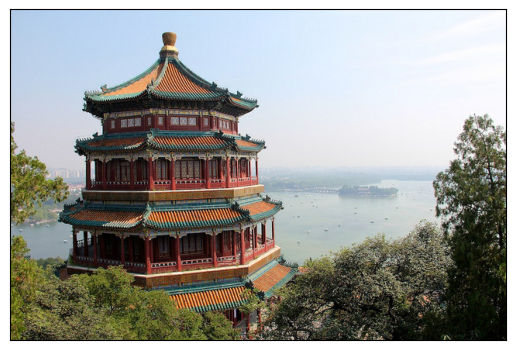

(427, 640, 3)
(273280, 3)


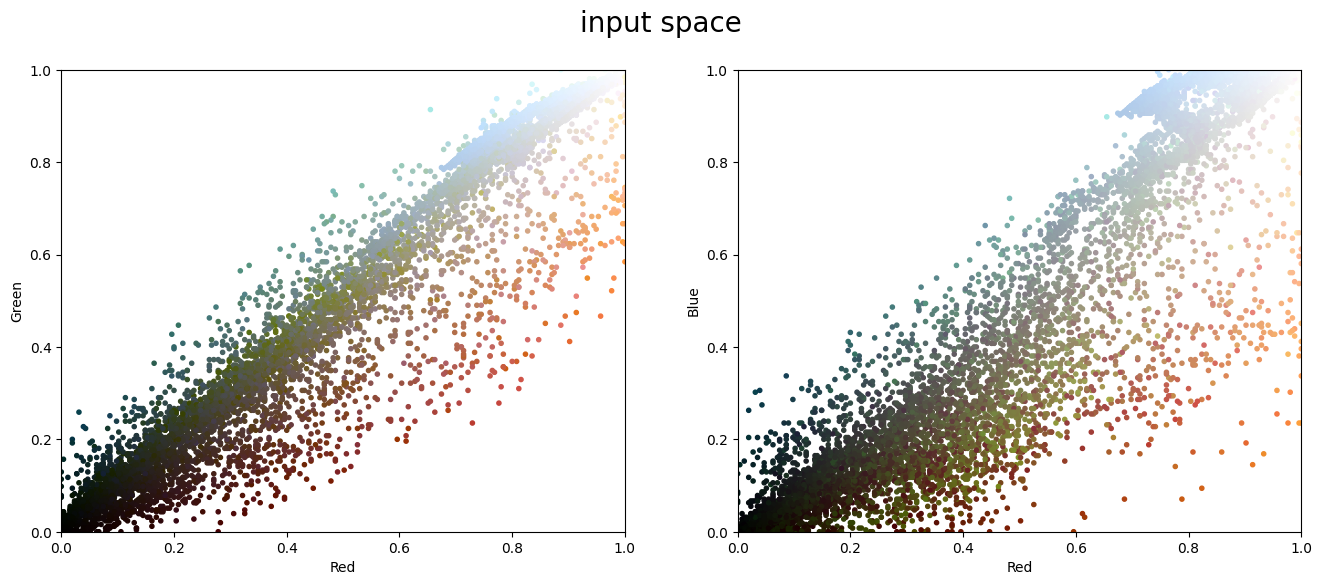

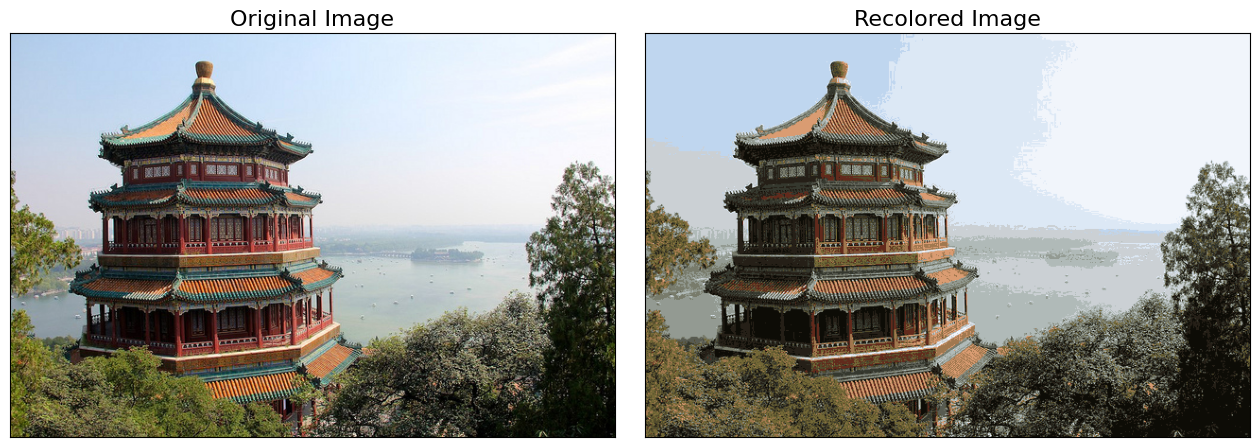

In [ ]:
##Unsupervised Algorithm- K Means Clustering
from sklearn.datasets import load_sample_image
from matplotlib import pyplot as plt
import numpy as np
china=load_sample_image("china.jpg")

ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)
plt.show()

print(china.shape)

data=china/255.0
data=data.reshape(427*640,3)
print(data.shape)

def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors=data

    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T

    fig, ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker=".")
    ax[0].set(xlabel="Red",ylabel="Green",xlim=(0,1),ylim=(0,1))

    ax[1].scatter(R,B,color=colors,marker=".")
    ax[1].set(xlabel="Red",ylabel="Blue",xlim=(0,1),ylim=(0,1))

    fig.suptitle(title,size=20);

plot_pixels(data, title="input space")
plt.show()

from sklearn.cluster import MiniBatchKMeans
model=MiniBatchKMeans(16)
model.fit(data)
new_colors=model.cluster_centers_[model.predict(data)]
plot_pixels(data,colors=new_colors,title="Reduced color space")
plt.show()

china_recolored=new_colors.reshape(china.shape)

fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image",size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("Recolored Image",size=16)
plt.show()



In [ ]:
#Reinforcement learning-Q Learning Algorithm
import numpy as np

# Define the rewards matrix
Rval=[[-1,-1,-1,-1,0,-1],[-1,-1,-1,0,-1,100],[-1,-1,-1,0,-1,-1],[-1,0,0,-1,0,-1],[-1,0,0,-1,-1,100],[-1,0,0,-1,0,100]]
r_mat = np.matrix(Rval) # Using r_mat as the variable name for the rewards matrix
print("Rewards Matrix:")
print(r_mat)

# Initialize the Q-matrix with zeros
Q = np.matrix(np.zeros([6,6]))
print("\nInitial Q Matrix:")
print(Q)

# Define learning parameters
gamma=0.8 # Discount factor
# initial_state=1 # This variable is defined but not used directly in the training loop below

# Helper function to get available actions from a given state
def available_actions(state):
    # Get the row corresponding to the current state in the rewards matrix
    current_state_row = r_mat[state,]
    # Find the indices where the reward is not -1 (i.e., where an action is possible)
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Helper function to randomly sample one action from the available actions
def sample_next_action(available_actions_range):
    # Sample a single action randomly from the list of available actions
    next_action = int(np.random.choice(available_actions_range, 1))
    return next_action

# Function to update the Q-matrix based on the Q-learning formula
def update(current_state, action, gamma):
    # Get the maximum Q-value for the next state (which is the chosen action)
    # np.where finds indices where condition is true. We want the indices of the max value.
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    # Handle cases where multiple actions have the same max Q-value
    if max_index.shape[0] > 1:
        # If multiple max values, randomly select one of their indices
        max_index = int(np.random.choice(max_index, size=1))
    else:
        # Otherwise, take the single max index
        max_index = int(max_index)

    # Find the corresponding max Q-value using the selected index
    max_value = Q[action, max_index]

    # Q-learning formula: Q(s,a) = R(s,a) + gamma * max(Q(s', a'))
    # Where s is current_state, a is action (which leads to state s'),
    # s' is the next state reached by taking action 'a'.
    # In this simplified example, the 'action' index itself is treated as the next state for the formula.
    # This might be an unusual representation depending on your specific state/action mapping.
    # A more typical Q-learning update uses Q[current_state, action] and max(Q[next_state, :]).
    # Based on the provided code structure, it seems the update might intend to use
    # Q[current_state, action] = r_mat[current_state, action] + gamma * max(Q[action, :])
    # where action is treated as the index of the next state. Let's use that interpretation.

    # Calculate the temporal difference target
    temporal_difference = r_mat[current_state, action] + gamma * max_value

    # Update the Q-value for the current state and chosen action
    Q[current_state, action] = temporal_difference

# -----------------------------------------------------------------------------
# Training Loop (episodes)
# -----------------------------------------------------------------------------

# Set the goal state (where the reward is high)
goal_state = 5

# Train the model for a number of episodes
num_episodes = 1000

print(f"\nTraining for {num_episodes} episodes...")

# Iterate through episodes
for i in range(num_episodes):
    # Start each episode from a random state (except the goal state)
    current_state = np.random.randint(0, Q.shape[0])
    # Ensure the initial state is not the goal state
    while current_state == goal_state:
         current_state = np.random.randint(0, Q.shape[0])


    # Continue the episode until the goal state is reached
    while current_state != goal_state:
        # Get available actions from the current state
        available_actions_for_state = available_actions(current_state)

        # If there are no available actions from this state, break the loop
        # (This might happen in sparse reward matrices if not all states have outbound paths)
        if len(available_actions_for_state) == 0:
             break

        # Sample a next action from the available actions
        action = sample_next_action(available_actions_for_state)

        # Update the Q-matrix using the Q-learning formula
        # Note: The update rule as partially written in the original code
        # (Q[action, max_index] = ...) seems unconventional.
        # The standard Q-learning update is Q[current_state, action] = R(s,a) + gamma * max(Q[next_state, :]).
        # Assuming the action taken leads to a 'next_state' which is the index of the action itself
        # based on the original update function's structure:
        # Let's refine the update logic based on typical Q-learning and the structure provided.
        # The standard update is Q[state, action] = R[state, action] + gamma * max(Q[next_state, :])
        # If 'action' is treated as the 'next_state' index:
        next_state = action # Assuming the action index corresponds to the next state index

        # Get the maximum Q-value for the *next state* (next_state) across all *its* possible actions
        # This requires knowing the available actions from the next_state.
        available_actions_for_next_state = available_actions(next_state)

        if len(available_actions_for_next_state) > 0:
             max_q_for_next_state = np.max(Q[next_state, available_actions_for_next_state])
        else:
             max_q_for_next_state = 0 # If next state has no actions, future reward is 0

        # Q-learning update: Q[current_state, action] = R[current_state, action] + gamma * max(Q[next_state, :])
        # The reward R(s,a) is r_mat[current_state, action]
        reward = r_mat[current_state, action]
        Q[current_state, action] = reward + gamma * max_q_for_next_state

        # Transition to the next state
        current_state = next_state

print("\nTraining finished.")
print("\nTrained Q Matrix:")
print(Q)

# -----------------------------------------------------------------------------
# Testing the learned policy
# -----------------------------------------------------------------------------

print("\nTesting the learned policy:")

# Function to choose the next action based on the learned Q-values
def choose_best_action(state):
    # Get available actions from the current state
    available_actions_for_state = available_actions(state)
    if len(available_actions_for_state) == 0:
        return None # No actions available

    # Find the action with the maximum Q-value among available actions
    # Filter Q-values for the current state to only available actions
    q_values_for_state = Q[state, available_actions_for_state]
    # Find the index of the maximum Q-value within the available actions array
    best_action_index_in_available = np.argmax(q_values_for_state)
    # Get the actual action index from the original list of available actions
    best_action = available_actions_for_state[best_action_index_in_available]
    return best_action

# Test starting from different states
start_state_test = 0
print(f"Starting from state {start_state_test}")
current_state_test = start_state_test
path = [current_state_test]

# Follow the policy until the goal state
while current_state_test != goal_state:
    next_action_test = choose_best_action(current_state_test)
    if next_action_test is None:
        print(f"Stuck at state {current_state_test}, no valid actions.")
        break
    # Assuming the action index is the next state index
    current_state_test = next_action_test
    path.append(current_state_test)

    # Add a safeguard to prevent infinite loops
    if len(path) > 100:
        print("Path seems too long, breaking to prevent infinite loop.")
        break


print(f"Path taken: {path}")

# You can test from other start states as well
# start_state_test = 2
# print(f"\nStarting from state {start_state_test}")
# current_state_test = start_state_test
# path = [current_state_test]
# while current_state_test != goal_state:
#     next_action_test = choose_best_action(current_state_test)
#     if next_action_test is None:
#         print(f"Stuck at state {current_state_test}, no valid actions.")
#         break
#     current_state_test = next_action_test
#     path.append(current_state_test)
#     if len(path) > 100:
#         print("Path seems too long, breaking to prevent infinite loop.")
#         break
# print(f"Path taken: {path}")

Rewards Matrix:
[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [ -1   0   0  -1  -1 100]
 [ -1   0   0  -1   0 100]]

Initial Q Matrix:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Training for 1000 episodes...


<ipython-input-14-1926532975>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))



Training finished.

Trained Q Matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.    0.    0.    0.    0.    0. ]]

Testing the learned policy:
Starting from state 0
Path taken: [0, np.int64(4), np.int64(5)]
